In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [37]:
# modules input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set(rc={'figure.figsize':(24, 20)})

# 2. Data

In [3]:
# data input
train_data = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/train.csv', index_col=0)
test_data = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/test.csv', index_col=0)

In [4]:
train_data

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158


In [5]:
train_data.shape

(70128, 5)

In [6]:
print('Missing Values')
train_data.isna().sum().sum()

Missing Values


0

In [7]:
print('Duplicated Values')
train_data.duplicated().sum()

Duplicated Values


0

In [8]:
train_data.dtypes

date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [9]:
train_data['num_sold'].describe()

count    70128.000000
mean       194.296986
std        126.893874
min         19.000000
25%         95.000000
50%        148.000000
75%        283.000000
max        986.000000
Name: num_sold, dtype: float64

In [10]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [11]:
train_data.dtypes

date        datetime64[ns]
country             object
store               object
product             object
num_sold             int64
dtype: object

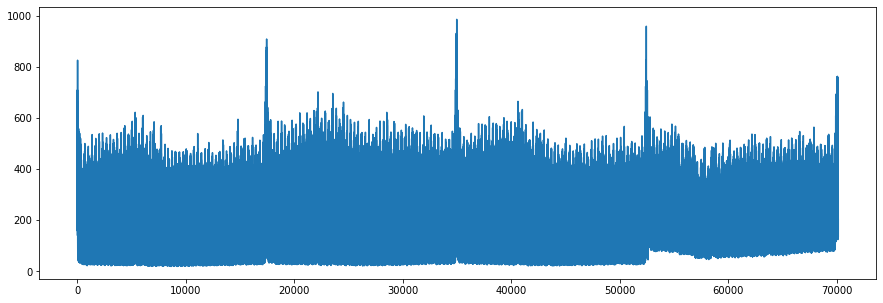

In [12]:
# Overall
plt.figure(figsize=(15,5))
plt.plot(train_data['num_sold'])

Initially split into 48 separate data for visualization


In [13]:
countries = ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']
stores = ['KaggleMart', 'KaggleRama']
products = ['Kaggle Advance Techniques', 'Kaggle Getting Started', 'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose']


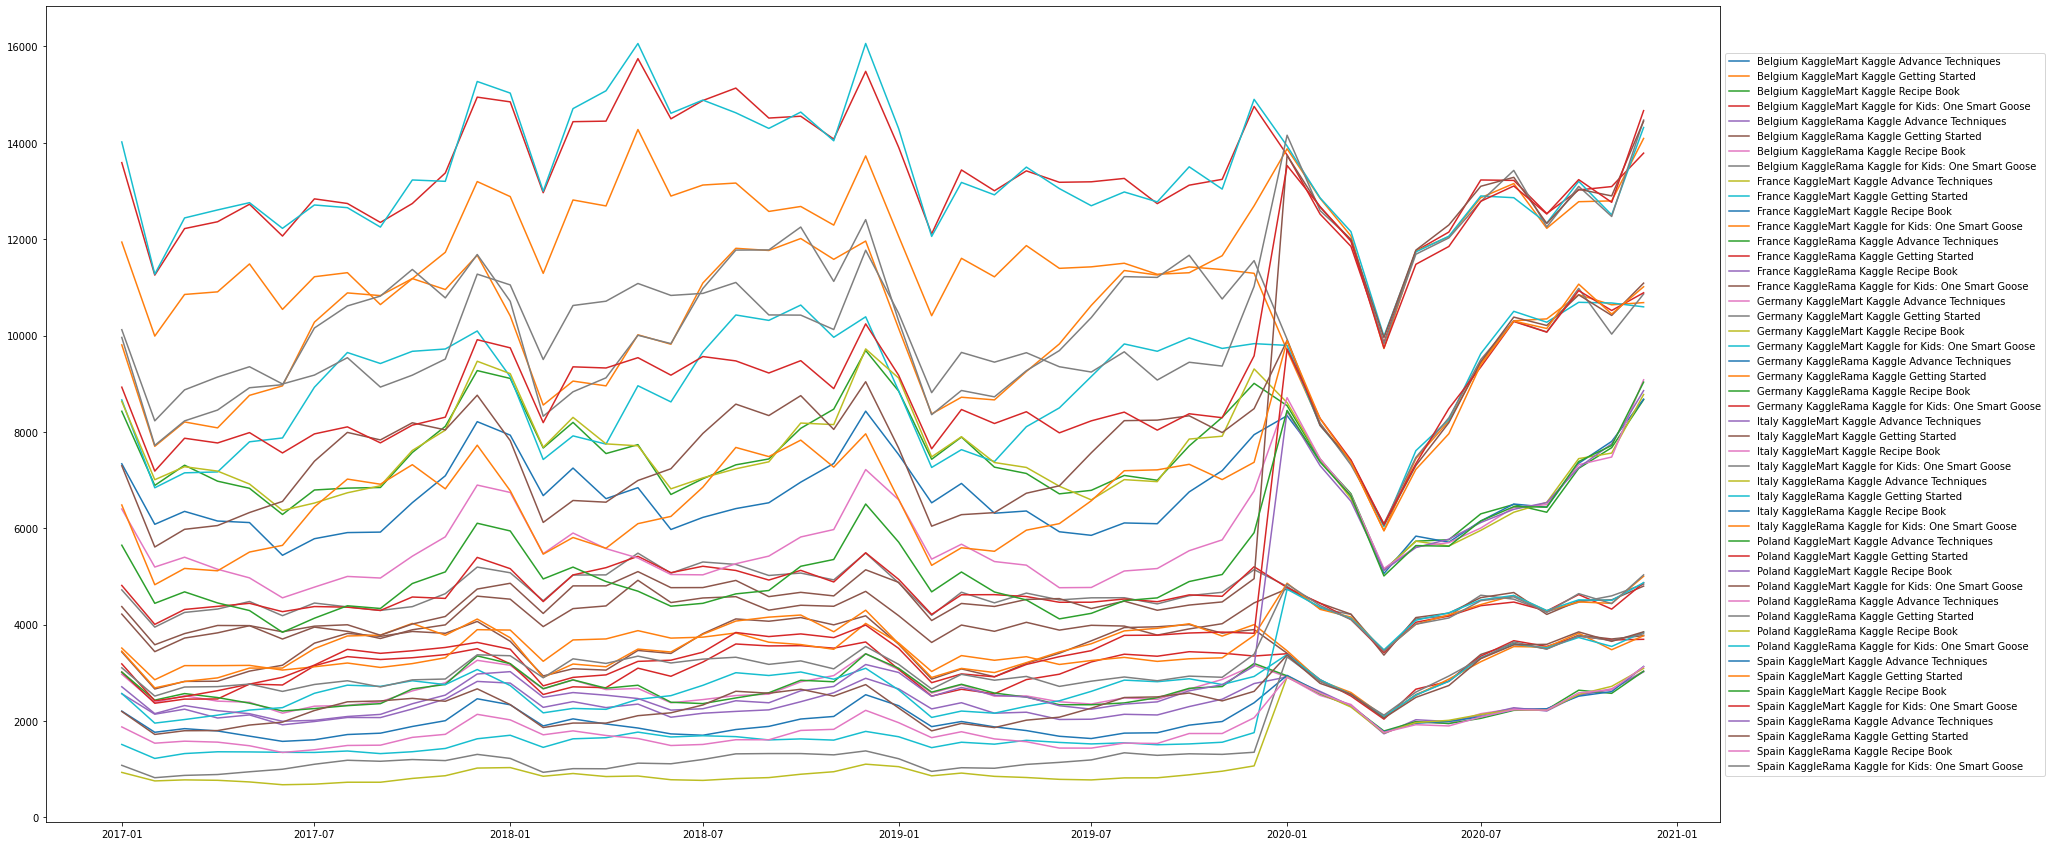

In [16]:
plt.figure(figsize=(30,15))
for country in countries:
    for store in stores:
        for product in products:
            temp = train_data[(train_data['country'] == country) & (train_data['store'] == store) & (train_data['product'] == product)]
            month = temp['date'].dt.to_period('M')
            temp_month = temp.groupby(month).sum()
            temp_month.index = temp_month.index.to_timestamp()
            plt.plot(temp_month, label=f'{country} {store} {product}')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

the overall trend through all time looks close especially after 2020. 
it is hard to distinguish from each country, so country by country



### Belgium

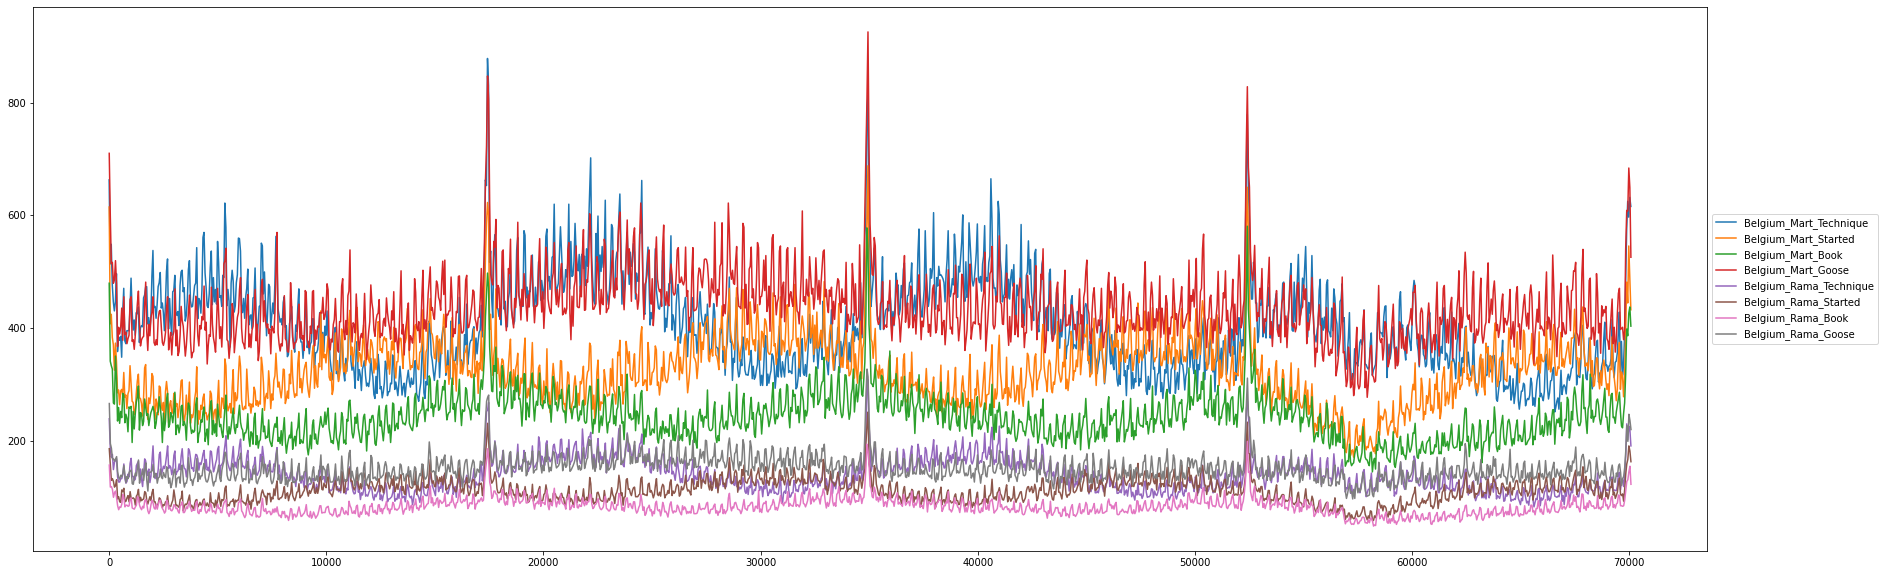

In [20]:
# split on several columns
# take Belgium as example
plt.figure(figsize=(30,10))
Belgium = train_data[train_data['country'] == 'Belgium']
# plt.plot(Belgium.num_sold)
Belgium_Mart = Belgium[Belgium['store'] == 'KaggleMart']
Belgium_Rama = Belgium[Belgium['store'] == 'KaggleRama']
# plt.plot(Belgium_Mart.num_sold)
# plt.plot(Belgium_Rama.num_sold)
Belgium_Mart_Technique = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle Advanced Techniques']
Belgium_Mart_Started = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle Getting Started']
Belgium_Mart_Book = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle Recipe Book']
Belgium_Mart_Goose = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle for Kids: One Smart Goose']
Belgium_Rama_Technique = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle Advanced Techniques']
Belgium_Rama_Started = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle Getting Started']
Belgium_Rama_Book = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle Recipe Book']
Belgium_Rama_Goose = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle for Kids: One Smart Goose']
Belgium_products = {'Belgium_Mart_Technique': Belgium_Mart_Technique, 'Belgium_Mart_Started': Belgium_Mart_Started, 'Belgium_Mart_Book': Belgium_Mart_Book, 'Belgium_Mart_Goose': Belgium_Mart_Goose, 
                    'Belgium_Rama_Technique': Belgium_Rama_Technique, 'Belgium_Rama_Started': Belgium_Rama_Started, 'Belgium_Rama_Book': Belgium_Rama_Book, 'Belgium_Rama_Goose': Belgium_Rama_Goose}
for key, value in Belgium_products.items():
    plt.plot(value.num_sold, label=key)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# plt.plot(Belgium_Mart_Technique.num_sold)


<AxesSubplot:xlabel='store-product', ylabel='store-product'>

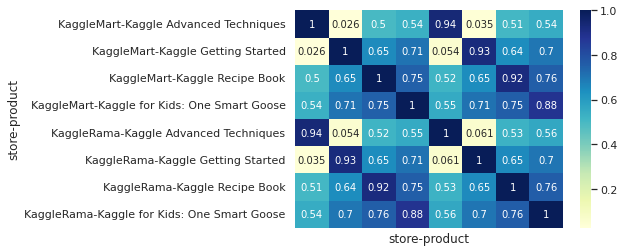

In [42]:
sns.heatmap(Belgium.pivot_table(index=['date'], columns=['store', 'product'], values='num_sold').corr(), annot=True, cmap='YlGnBu', xticklabels=False)


The correlation heatmap shows same product at different stores are highly correlated


### France

In [52]:
France = train_data[train_data['country'] == 'France']
France.head()

,date,country,store,product,num_sold
row_id,,,,,
8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463
10,2017-01-01,France,KaggleMart,Kaggle Recipe Book,407
11,2017-01-01,France,KaggleMart,Kaggle for Kids: One Smart Goose,672
12,2017-01-01,France,KaggleRama,Kaggle Advanced Techniques,220


In [56]:
France.pivot_table(index=['date'], values='num_sold', columns=['store', 'product'])

store                      KaggleMart                         \
product    Kaggle Advanced Techniques Kaggle Getting Started   
date                                                           
2017-01-01                        610                    463   
2017-01-02                        455                    364   
2017-01-03                        465                    362   
2017-01-04                        465                    311   
2017-01-05                        385                    323   
...                               ...                    ...   
2020-12-27                        552                    450   
2020-12-28                        574                    384   
2020-12-29                        615                    479   
2020-12-30                        621                    568   
2020-12-31                        575                    446   

store                                                           \
product    Kaggle Recipe Book Kaggle for Kids: One Smart Goose   
date                                                             
2017-01-01                407                              672   
2017-01-02                286                              506   
2017-01-03                252                              433   
2017-01-04                281                              460   
2017-01-05                259                              402   
...                       ...                              ...   
2020-12-27                388                              677   
2020-12-28                380                              630   
2020-12-29                447                              715   
2020-12-30                445                              688   
2020-12-31                394                              570   

store                      KaggleRama                         \
product    Kaggle Advanced Techniques Kaggle Getting Started   
date                                                           
2017-01-01                        220                    172   
2017-01-02                        159                    131   
2017-01-03                        155                    114   
2017-01-04                        152                    119   
2017-01-05                        150                    114   
...                               ...                    ...   
2020-12-27                        208                    171   
2020-12-28                        194                    146   
2020-12-29                        223                    192   
2020-12-30                        229                    178   
2020-12-31                        212                    166   

store                                                           
product    Kaggle Recipe Book Kaggle for Kids: One Smart Goose  
date                                                            
2017-01-01                140                              255  
2017-01-02                101                              180  
2017-01-03                101                              161  
2017-01-04                102                              163  
2017-01-05                 97                              164  
...                       ...                              ...  
2020-12-27                133                              225  
2020-12-28                132                              219  
2020-12-29                150                              232  
2020-12-30                130                              224  
2020-12-31                145                              210  

[1461 rows x 8 columns]

<AxesSubplot:xlabel='store-product', ylabel='store-product'>

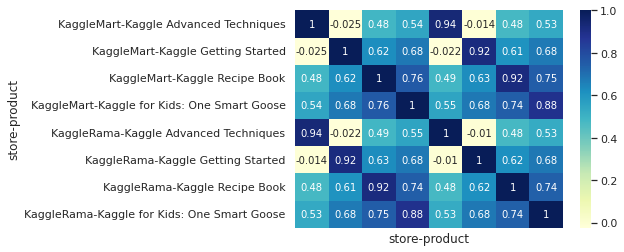

In [57]:
sns.heatmap(France.pivot_table(index=['date'], columns=['store', 'product'], values='num_sold').corr(), annot=True, cmap='YlGnBu', xticklabels=False)

### More countries

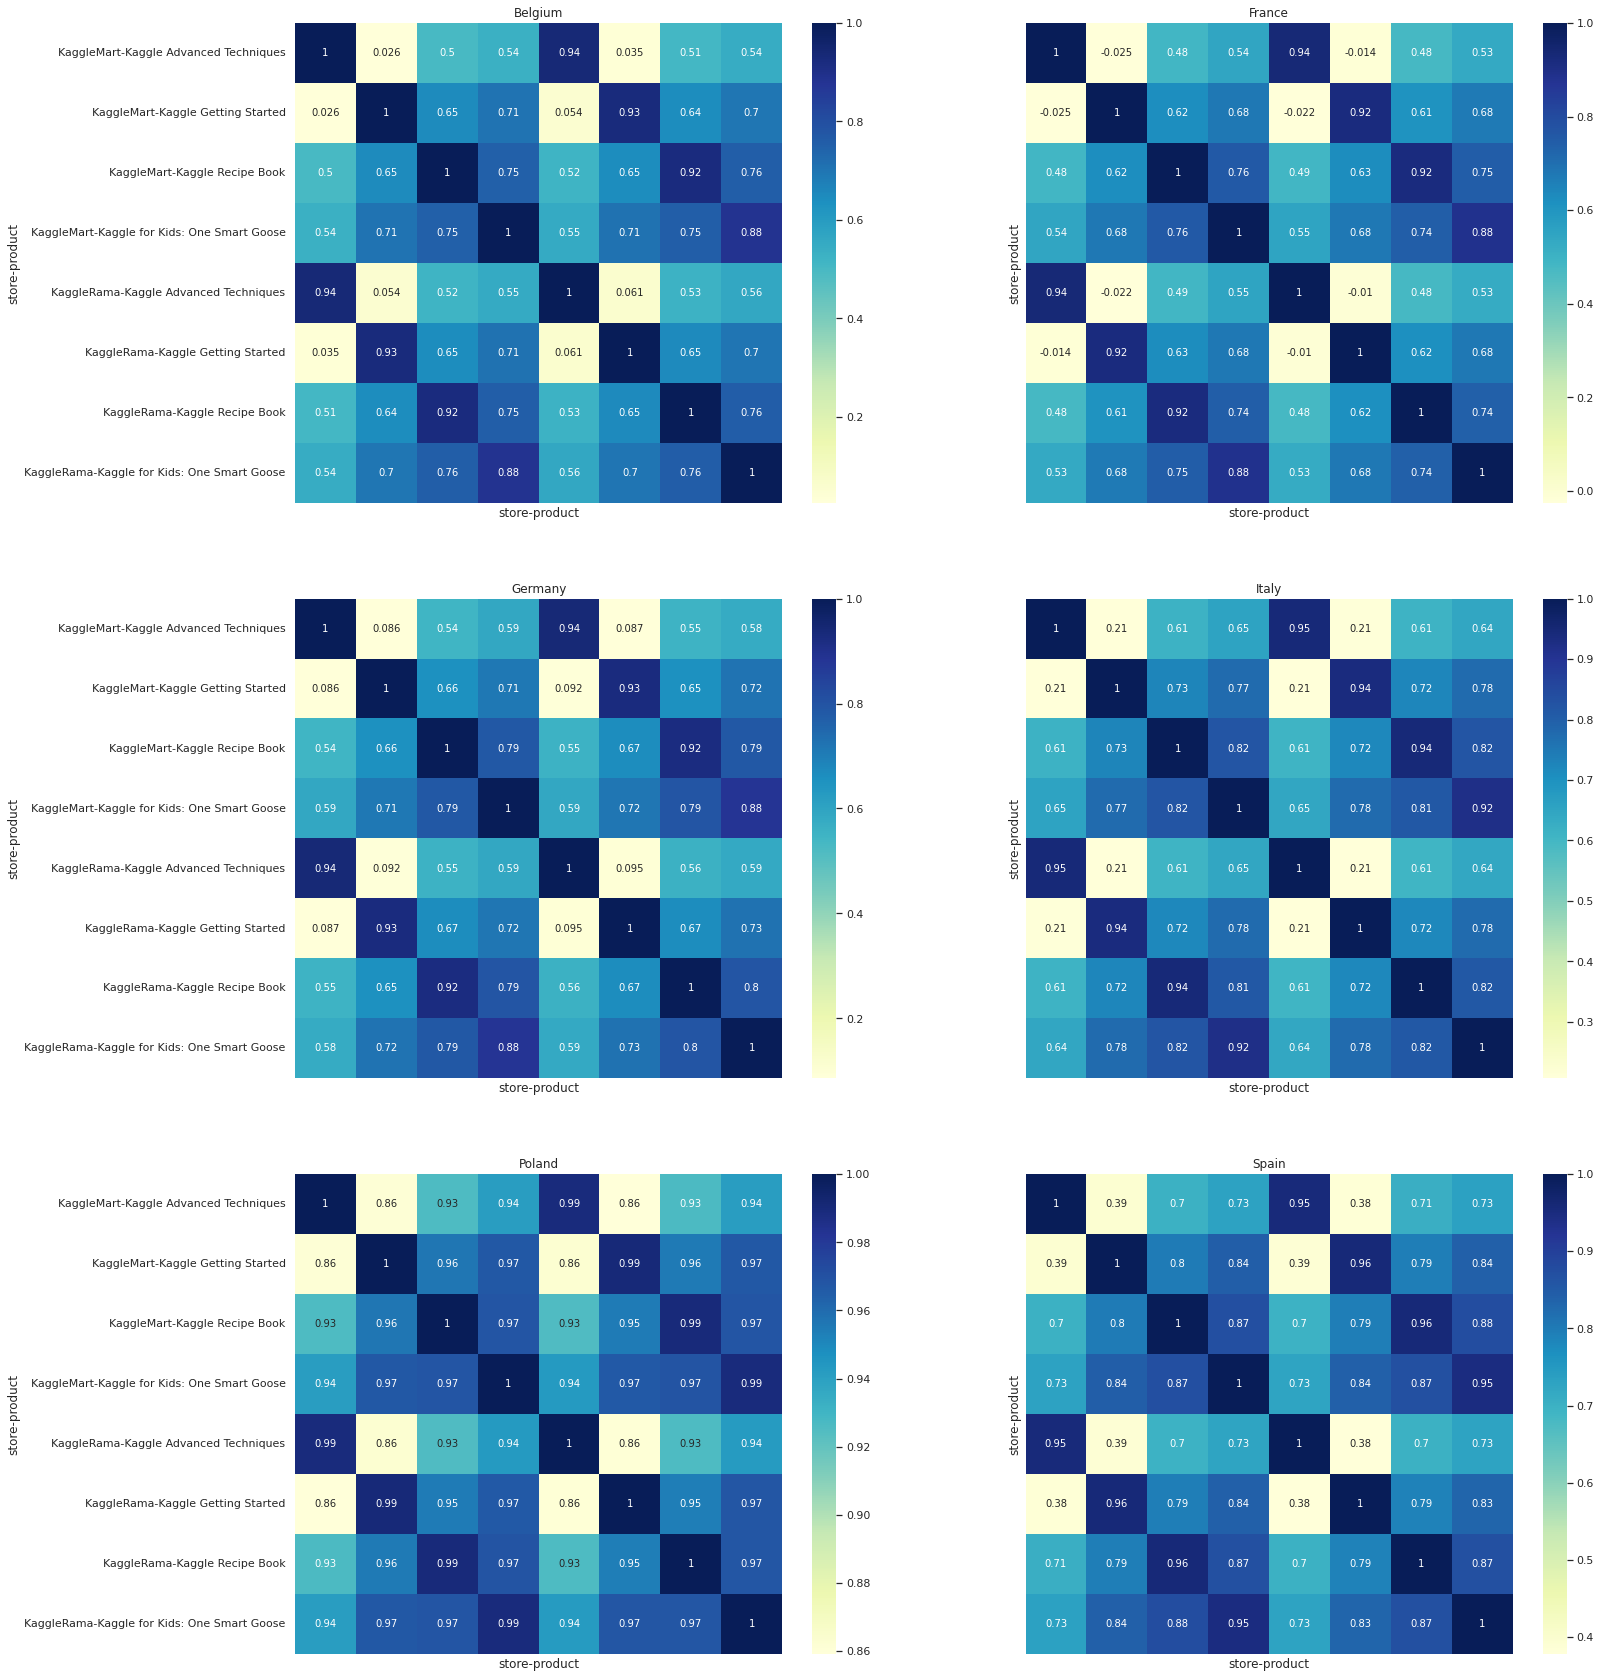

In [76]:
fig, axes = plt.subplots(3, 2, figsize=(24,30), sharey=True, sharex=True)

countries = ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain', ]
for ax, each in zip(axes.ravel(), countries):
    temp = train_data[train_data['country'] == each]
    corr_mat = temp.pivot_table(index=['date'], columns=['store', 'product'], values='num_sold').corr()
    sns.heatmap(corr_mat, annot=True, cmap='YlGnBu', xticklabels=False, ax=ax)
    ax.set_title(each)

In [77]:
train_data.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [81]:
train_data.pivot(index=['date','country', 'store'], columns='product', values='num_sold').corr()

product,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose
product,,,,
Kaggle Advanced Techniques,1.000000,0.871266,0.934723,0.945936
Kaggle Getting Started,0.871266,1.000000,0.957478,0.968392
Kaggle Recipe Book,0.934723,0.957478,1.000000,0.974265
Kaggle for Kids: One Smart Goose,0.945936,0.968392,0.974265,1.000000


In [ ]:
for each in Belgium_products:
    print(f'{each}')

In [ ]:
monthly = Belgium_Mart_Technique.date.dt.to_period("M")
BMT_month = Belgium_Mart_Technique.groupby(monthly).sum()



In [ ]:
BMT_month.index

In [ ]:
BMT_month.index = BMT_month.index.to_timestamp()

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(BMT_month.num_sold)

In [ ]:
BMT_month.num_sold.plot()


In [ ]:
train_data.country.unique()

In [ ]:
train_data.pivot_table(values='num_sold', index=['date', 'country', 'store'], columns=['product'])

In [ ]:
train_data.head()